In [1]:
#importing libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", font_scale=1.5, style="white")
import scipy.stats as st

import scona as scn
from scona.scripts.visualisation_commands import view_corr_mat

In [2]:
#Sets path directory
import os
os.chdir('C:/Users/Emre/OneDrive/Penn State/Masters Data')

#loads dataset
area = pd.read_csv('Freesurfer_area_nosub_subjrmv.csv')
area.head()

,lh_G&S_frontomargin_area,lh_G&S_occipital_inf_area,lh_G&S_paracentral_area,lh_G&S_subcentral_area,lh_G&S_transv_frontopol_area,lh_G&S_cingul-Ant_area,lh_G&S_cingul-Mid-Ant_area,lh_G&S_cingul-Mid-Post_area,lh_G_cingul-Post-dorsal_area,lh_G_cingul-Post-ventral_area,...,rh_S_precentral-inf-part_area,rh_S_precentral-sup-part_area,rh_S_suborbital_area,rh_S_subparietal_area,rh_S_temporal_inf_area,rh_S_temporal_sup_area,rh_S_temporal_transverse_area,rh_WhiteSurfArea_area,rh_BrainSegVolNotVent,rh_eTIV
0,573,977,876,1024,552,1779,899,821,384,211,...,867,830,207,781,807,3805,157,77622.7,1019910,1488540.261
1,1042,705,1016,1102,391,1249,859,1062,464,235,...,1421,1312,241,945,1061,4245,222,87830.1,1098965,1585302.823
2,657,1030,986,908,387,1462,816,935,410,184,...,1054,1135,185,779,1028,4213,244,81654.0,1014831,1437986.052
3,1362,887,1145,905,586,1050,593,740,460,204,...,1174,920,169,788,952,5231,215,88353.9,1072009,1592170.934
4,634,794,685,547,377,1192,665,662,155,122,...,624,565,159,528,510,2607,71,49295.1,657635,1022861.209


In [3]:
#loads list of brain regions
names = []
with open('region_names_area.txt') as f:
    names = f.readlines()
f.close()

names = [''.join(item.split()) for item in names]

In [4]:
print(names)

['lh_G&S_frontomargin_area', 'lh_G&S_occipital_inf_area', 'lh_G&S_paracentral_area', 'lh_G&S_subcentral_area', 'lh_G&S_transv_frontopol_area', 'lh_G&S_cingul-Ant_area', 'lh_G&S_cingul-Mid-Ant_area', 'lh_G&S_cingul-Mid-Post_area', 'lh_G_cingul-Post-dorsal_area', 'lh_G_cingul-Post-ventral_area', 'lh_G_cuneus_area', 'lh_G_front_inf-Opercular_area', 'lh_G_front_inf-Orbital_area', 'lh_G_front_inf-Triangul_area', 'lh_G_front_middle_area', 'lh_G_front_sup_area', 'lh_G_Ins_lg&S_cent_ins_area', 'lh_G_insular_short_area', 'lh_G_occipital_middle_area', 'lh_G_occipital_sup_area', 'lh_G_oc-temp_lat-fusifor_area', 'lh_G_oc-temp_med-Lingual_area', 'lh_G_oc-temp_med-Parahip_area', 'lh_G_orbital_area', 'lh_G_pariet_inf-Angular_area', 'lh_G_pariet_inf-Supramar_area', 'lh_G_parietal_sup_area', 'lh_G_postcentral_area', 'lh_G_precentral_area', 'lh_G_precuneus_area', 'lh_G_rectus_area', 'lh_G_subcallosal_area', 'lh_G_temp_sup-G_T_transv_area', 'lh_G_temp_sup-Lateral_area', 'lh_G_temp_sup-Plan_polar_area', '

In [5]:
#Creates residuals
covars = []

area_res = scn.create_residuals_df(area, names, covars)
area_res.head()

,lh_G&S_frontomargin_area,lh_G&S_occipital_inf_area,lh_G&S_paracentral_area,lh_G&S_subcentral_area,lh_G&S_transv_frontopol_area,lh_G&S_cingul-Ant_area,lh_G&S_cingul-Mid-Ant_area,lh_G&S_cingul-Mid-Post_area,lh_G_cingul-Post-dorsal_area,lh_G_cingul-Post-ventral_area,...,rh_S_parieto_occipital_area,rh_S_pericallosal_area,rh_S_postcentral_area,rh_S_precentral-inf-part_area,rh_S_precentral-sup-part_area,rh_S_suborbital_area,rh_S_subparietal_area,rh_S_temporal_inf_area,rh_S_temporal_sup_area,rh_S_temporal_transverse_area
0,-204.295455,-75.681818,-77.659091,59.386364,92.090909,329.954545,49.227273,-48.5,-5.454545,-40.522727,...,172.045455,0.181818,-88.659091,-232.522727,-111.522727,-8.272727,-31.818182,-35.318182,-80.295455,-36.795455
1,264.704545,-347.681818,62.340909,137.386364,-68.909091,-200.045455,9.227273,192.5,74.545455,-16.522727,...,-135.954545,238.181818,150.340909,321.477273,370.477273,25.727273,132.181818,218.681818,359.704545,28.204545
2,-120.295455,-22.681818,32.340909,-56.613636,-72.909091,12.954545,-33.772727,65.5,20.545455,-67.522727,...,135.045455,43.181818,-450.659091,-45.522727,193.477273,-30.272727,-33.818182,185.681818,327.704545,50.204545
3,584.704545,-165.681818,191.340909,-59.613636,126.090909,-399.045455,-256.772727,-129.5,70.545455,-47.522727,...,520.045455,-2.818182,139.340909,74.477273,-21.522727,-46.272727,-24.818182,109.681818,1345.704545,21.204545
4,-143.295455,-258.681818,-268.659091,-417.613636,-82.909091,-257.045455,-184.772727,-207.5,-234.454545,-129.522727,...,-462.954545,-388.818182,-823.659091,-475.522727,-376.522727,-56.272727,-284.818182,-332.318182,-1278.295455,-122.795455


In [6]:
#Creates correlation matrix
M = scn.create_corrmat(area_res)
M.head()

,lh_G&S_frontomargin_area,lh_G&S_occipital_inf_area,lh_G&S_paracentral_area,lh_G&S_subcentral_area,lh_G&S_transv_frontopol_area,lh_G&S_cingul-Ant_area,lh_G&S_cingul-Mid-Ant_area,lh_G&S_cingul-Mid-Post_area,lh_G_cingul-Post-dorsal_area,lh_G_cingul-Post-ventral_area,...,rh_S_parieto_occipital_area,rh_S_pericallosal_area,rh_S_postcentral_area,rh_S_precentral-inf-part_area,rh_S_precentral-sup-part_area,rh_S_suborbital_area,rh_S_subparietal_area,rh_S_temporal_inf_area,rh_S_temporal_sup_area,rh_S_temporal_transverse_area
lh_G&S_frontomargin_area,1.000000,0.158496,0.262464,0.191473,0.456069,0.083360,0.021051,0.114957,0.263066,-0.057088,...,0.225961,0.231805,0.450906,0.320760,0.224515,0.060017,0.211464,0.264036,0.424041,0.249352
lh_G&S_occipital_inf_area,0.158496,1.000000,0.312492,-0.099118,0.244008,0.178336,0.148044,-0.063165,-0.065261,-0.139553,...,0.281702,0.325729,0.412886,0.229919,0.050637,0.205949,0.288631,0.143958,0.086763,0.268827
lh_G&S_paracentral_area,0.262464,0.312492,1.000000,0.493005,0.285040,0.402662,0.415008,0.510643,0.331983,-0.058597,...,0.434887,0.340918,0.641800,0.425288,0.123482,0.189529,0.429120,0.307319,0.264437,0.485736
lh_G&S_subcentral_area,0.191473,-0.099118,0.493005,1.000000,0.444178,0.392951,0.317143,0.559954,0.589847,0.248394,...,0.388353,0.323382,0.558763,0.396588,0.334488,-0.058954,0.320292,0.401820,0.269897,0.467439
lh_G&S_transv_frontopol_area,0.456069,0.244008,0.285040,0.444178,1.000000,0.389692,0.145818,0.137033,0.338508,0.116649,...,0.398614,0.287582,0.573437,0.251949,0.145242,0.013919,0.258500,0.093173,0.343337,0.312227


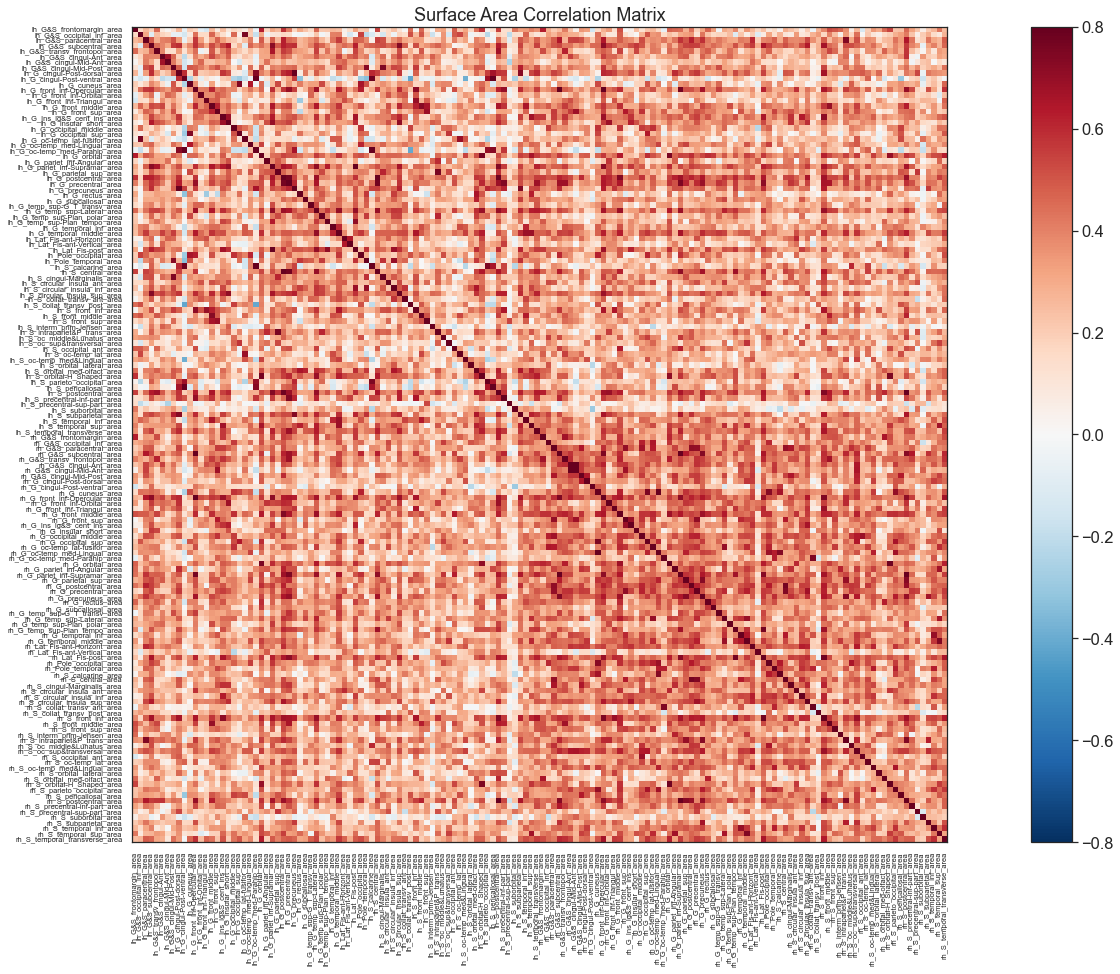

In [7]:
#Creates a correlation matrix graph
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
im = ax.imshow(M, cmap = "RdBu_r", vmin=-0.8, vmax=0.8)
ax.set_title("Surface Area Correlation Matrix")

#Sets axis lables
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names, rotation=90, fontsize=7.5)
ax.set_yticklabels(names,fontsize=7.5)

fig.colorbar(im, orientation="vertical", fraction = 0.05)
plt.show()

In [8]:
#Creates SCN using the correlation matrix
G = scn.BrainNetwork(network=M, parcellation=names)

#Obtains weight data from an edge
G.edges[0,1]

{'weight': 0.15849631585509977}

In [9]:
#Binarizes the graph by thresholding the nodes at the top 10%
G10 = G.threshold(10)

In [10]:
#Prompt to test if a particular node still exists
try:
    G10.edges[(0,1)]
except KeyError:
    print("This edge does not exist!")

This edge does not exist!


In [11]:
#Calculates the network measures and prints them out
G10.calculate_nodal_measures()
G10_measures = G10.report_nodal_measures()
G10_measures

,name,module,degree,closeness,betweenness,shortest_path_length,clustering,participation_coefficient
0,lh_G&S_frontomargin_area,0,8,0.397297,0.000253,2.5,0.607143,0.609375
1,lh_G&S_occipital_inf_area,1,3,0.30123,0.000661,3.297297,0.333333,0.0
2,lh_G&S_paracentral_area,2,16,0.45092,0.004225,2.202703,0.591667,0.859375
3,lh_G&S_subcentral_area,3,30,0.501706,0.02027,1.97973,0.491954,0.678889
4,lh_G&S_transv_frontopol_area,4,10,0.422414,0.003204,2.351351,0.666667,0.84
...,...,...,...,...,...,...,...,...
143,rh_S_suborbital_area,2,1,0.275797,0.0,3.601351,0,0.0
144,rh_S_subparietal_area,3,7,0.415254,0.000295,2.391892,0.809524,0.673469
145,rh_S_temporal_inf_area,1,12,0.428571,0.003957,2.317568,0.393939,0.888889
146,rh_S_temporal_sup_area,2,10,0.409471,0.003077,2.425676,0.444444,0.51


In [12]:
#Extracts values from the right orbital inferior frontal gyrus
print(G10_measures.loc[86])

#Extracts values from the right middle frontal gyrus
print(G10_measures.loc[88])

name                         rh_G_front_inf-Orbital_area
module                                                 3
degree                                                18
closeness                                       0.460815
betweenness                                     0.025804
shortest_path_length                            2.155405
clustering                                       0.51634
participation_coefficient                       0.395062
Name: 86, dtype: object
name                         rh_G_front_middle_area
module                                            4
degree                                           46
closeness                                  0.542435
betweenness                                0.053814
shortest_path_length                       1.831081
clustering                                 0.325604
participation_coefficient                  0.976843
Name: 88, dtype: object


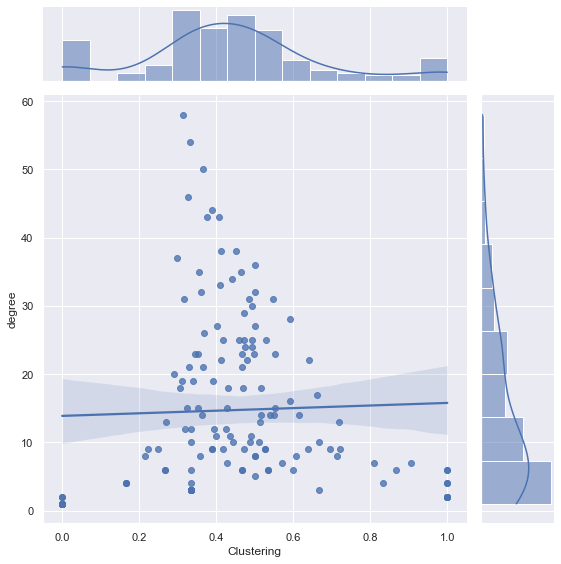

(0.03586032104453909, 0.6652328504274966)

In [13]:
#Creates a test regression plot
nodal_df = G10.report_nodal_measures(columns=['degree', 'clustering'])

sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot(data=nodal_df, y='degree', x='clustering', kind='reg', height=8)
j.ax_joint.set_xlabel('Clustering')
plt.show()
st.pearsonr(nodal_df['degree'], nodal_df['clustering'])

In [41]:
#Calculates Global measures
G10.calculate_global_measures()

{'average_clustering': 0.4331941735691245,
 'average_shortest_path_length': 2.5073542930685786,
 'assortativity': 0.12067257626216434,
 'modularity': 0.27581850467668684,
 'efficiency': 0.46061776061777915}

In [42]:
#Creates an initial brain bundle
brain_bundle = scn.GraphBundle([G10], ['surfarea_cost10'])

In [43]:
#Test to see if a dictionary like object has been created
brain_bundle

{'surfarea_cost10': <scona.classes.BrainNetwork at 0x1b31be67d60>}

In [44]:
#Creates randomized graphs using the observed brain network as the baseline
brain_bundle.create_random_graphs('surfarea_cost10', 44)

        Creating 44 random graphs - may take a little while


In [45]:
#Test to see if the randomized graphs have been created
brain_bundle

{'surfarea_cost10': <scona.classes.BrainNetwork at 0x1b31be67d60>,
 'surfarea_cost10_R0': <scona.classes.BrainNetwork at 0x1b31f3636d0>,
 'surfarea_cost10_R1': <scona.classes.BrainNetwork at 0x1b31bb10e20>,
 'surfarea_cost10_R2': <scona.classes.BrainNetwork at 0x1b31bf15100>,
 'surfarea_cost10_R3': <scona.classes.BrainNetwork at 0x1b31f5d4c10>,
 'surfarea_cost10_R4': <scona.classes.BrainNetwork at 0x1b31c27ca30>,
 'surfarea_cost10_R5': <scona.classes.BrainNetwork at 0x1b31f190df0>,
 'surfarea_cost10_R6': <scona.classes.BrainNetwork at 0x1b31f94f040>,
 'surfarea_cost10_R7': <scona.classes.BrainNetwork at 0x1b31bb10e50>,
 'surfarea_cost10_R8': <scona.classes.BrainNetwork at 0x1b31e846160>,
 'surfarea_cost10_R9': <scona.classes.BrainNetwork at 0x1b31a5dd7c0>,
 'surfarea_cost10_R10': <scona.classes.BrainNetwork at 0x1b31a5ddf10>,
 'surfarea_cost10_R11': <scona.classes.BrainNetwork at 0x1b31a5dd8b0>,
 'surfarea_cost10_R12': <scona.classes.BrainNetwork at 0x1b31a5dd640>,
 'surfarea_cost10_R1

In [49]:
#Reports on the global measures of the randomized graphs
average_global = brain_bundle.report_global_measures()
average_global

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency
surfarea_cost10,0.433194,2.507354,0.120673,0.275819,0.460618
surfarea_cost10_R0,0.288121,2.228627,-0.141465,0.185470,0.496606
surfarea_cost10_R1,0.272127,2.275970,-0.077484,0.178501,0.489607
surfarea_cost10_R2,0.270371,2.235981,-0.153805,0.179379,0.495695
surfarea_cost10_R3,0.269990,2.253907,-0.142778,0.173826,0.493628
surfarea_cost10_R4,0.280064,2.223846,-0.190712,0.175801,0.497841
surfarea_cost10_R5,0.278343,2.238187,-0.138625,0.181437,0.495154
surfarea_cost10_R6,0.267431,2.255746,-0.143827,0.182930,0.493694
surfarea_cost10_R7,0.272423,2.247656,-0.126769,0.172359,0.494069
surfarea_cost10_R8,0.286199,2.244346,-0.143578,0.177622,0.494769


In [50]:
#Removes the first row due to outlier data (the observed graph)
average_global_noout = average_global.drop('surfarea_cost10')
average_global_noout

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency
surfarea_cost10_R0,0.288121,2.228627,-0.141465,0.185470,0.496606
surfarea_cost10_R1,0.272127,2.275970,-0.077484,0.178501,0.489607
surfarea_cost10_R2,0.270371,2.235981,-0.153805,0.179379,0.495695
surfarea_cost10_R3,0.269990,2.253907,-0.142778,0.173826,0.493628
surfarea_cost10_R4,0.280064,2.223846,-0.190712,0.175801,0.497841
surfarea_cost10_R5,0.278343,2.238187,-0.138625,0.181437,0.495154
surfarea_cost10_R6,0.267431,2.255746,-0.143827,0.182930,0.493694
surfarea_cost10_R7,0.272423,2.247656,-0.126769,0.172359,0.494069
surfarea_cost10_R8,0.286199,2.244346,-0.143578,0.177622,0.494769
surfarea_cost10_R9,0.278005,2.260158,-0.139219,0.175838,0.492816


In [51]:
#Loads the neuropsych data
neuropsych = pd.read_csv('Neuropsych_data_wcit.csv')
neuropsych.head()

,Participant ID:,Inhibition: Time (seconds),Inhibition Scaled Score
0,P06,97,5
1,P07,49,14
2,P08,149,1
3,P101,80,6
4,P107,59,3


In [52]:
#Adding the inhibition scaled score and inhibition time columns from the neuropsych dataset into the random network graphs dataframe
average_global_noout['Inhibition Scaled Score'] = neuropsych['Inhibition Scaled Score'].values
average_global_noout['Inhibition: Time (seconds)'] = neuropsych['Inhibition: Time (seconds)'].values
average_global_noout

,average_clustering,average_shortest_path_length,assortativity,modularity,efficiency,Inhibition Scaled Score,Inhibition: Time (seconds)
surfarea_cost10_R0,0.288121,2.228627,-0.141465,0.185470,0.496606,5,97
surfarea_cost10_R1,0.272127,2.275970,-0.077484,0.178501,0.489607,14,49
surfarea_cost10_R2,0.270371,2.235981,-0.153805,0.179379,0.495695,1,149
surfarea_cost10_R3,0.269990,2.253907,-0.142778,0.173826,0.493628,6,80
surfarea_cost10_R4,0.280064,2.223846,-0.190712,0.175801,0.497841,3,59
surfarea_cost10_R5,0.278343,2.238187,-0.138625,0.181437,0.495154,2,99
surfarea_cost10_R6,0.267431,2.255746,-0.143827,0.182930,0.493694,2,103
surfarea_cost10_R7,0.272423,2.247656,-0.126769,0.172359,0.494069,8,72
surfarea_cost10_R8,0.286199,2.244346,-0.143578,0.177622,0.494769,10,68
surfarea_cost10_R9,0.278005,2.260158,-0.139219,0.175838,0.492816,8,71


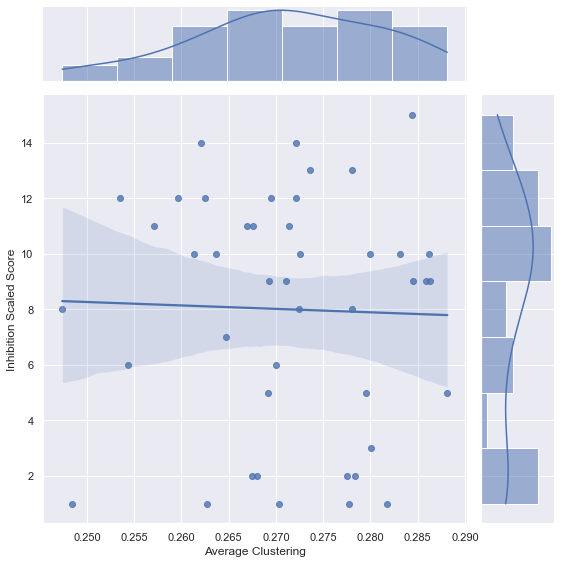

(-0.03005212792248771, 0.8464514041330323)

In [53]:
#Creates a regression plot for the scaled score vs clustering
sns.set(style="darkgrid", color_codes=True)
l = sns.jointplot(data=average_global_noout, y='Inhibition Scaled Score', x='average_clustering', kind='reg', height=8)
l.ax_joint.set_xlabel('Average Clustering')
plt.show()
st.pearsonr(average_global_noout['average_clustering'], average_global_noout['Inhibition Scaled Score'])

In [54]:
#Creates a regression model for score vs clustering
import statsmodels.api as sm

#Sets variables
Y1 = average_global_noout['Inhibition Scaled Score']
X1= average_global_noout['average_clustering']

#Adds constant
X1 = sm.add_constant(X1)

#Prints out the results of the regression model
model1 = sm.OLS(Y1, X1, missing='drop')
results1= model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Inhibition Scaled Score   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                 -0.023
Method:                      Least Squares   F-statistic:                   0.03797
Date:                     Mon, 06 Jun 2022   Prob (F-statistic):              0.846
Time:                             21:33:10   Log-Likelihood:                -125.27
No. Observations:                       44   AIC:                             254.5
Df Residuals:                           42   BIC:                             258.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.3517     17.214      0.659      0.513     -23.387      46.091
average_clustering   -12.3615     63.442     -0.195      0.846    -140.392     115.669
==============================================================================
Omnibus:                        6.392   Durbin-Watson:                   2.538
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                3.161
Skew:                          -0.409   Prob(JB):                        0.206
Kurtosis:                       1.973   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#Calculates the standard error of the estimate for score vs clustering
np.sqrt(results1.scale)

4.268679404684933

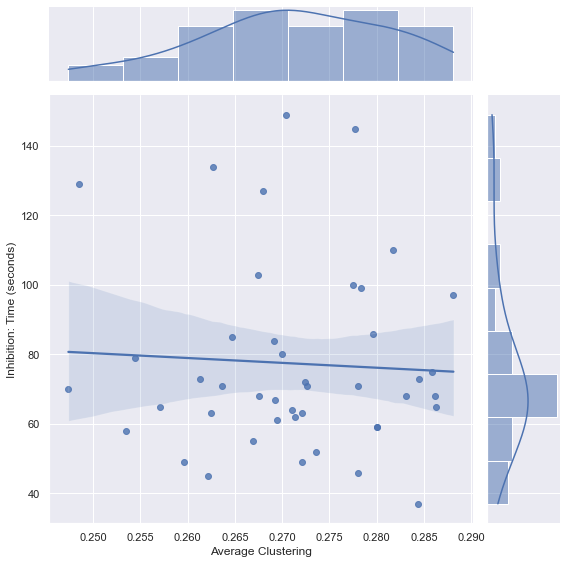

(-0.05355082374418402, 0.7299156198295654)

In [56]:
#Creates a regression plot for score vs inhibition time
sns.set(style="darkgrid", color_codes=True)
m = sns.jointplot(data=average_global_noout, y='Inhibition: Time (seconds)', x='average_clustering', kind='reg', height=8)
m.ax_joint.set_xlabel('Average Clustering')
plt.show()
st.pearsonr(average_global_noout['average_clustering'], average_global_noout['Inhibition: Time (seconds)'])

In [57]:
#Creates regression model for the clustering vs time data
import statsmodels.api as sm

#Sets variables
Y2 = average_global_noout['Inhibition: Time (seconds)']
X2= average_global_noout['average_clustering']

#Adds constant
X2 = sm.add_constant(X2)

#Prints out the results of the regression model
model2 = sm.OLS(Y2, X2, missing='drop')
results2= model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Inhibition: Time (seconds)   R-squared:                       0.003
Model:                                    OLS   Adj. R-squared:                 -0.021
Method:                         Least Squares   F-statistic:                    0.1208
Date:                        Mon, 06 Jun 2022   Prob (F-statistic):              0.730
Time:                                21:33:26   Log-Likelihood:                -206.49
No. Observations:                          44   AIC:                             417.0
Df Residuals:                              42   BIC:                             420.6
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                115.2819    109.048      1.057      0.296    -104.785     335.349
average_clustering  -139.6776    401.895     -0.348      0.730    -950.734     671.379
==============================================================================
Omnibus:                       10.779   Durbin-Watson:                   2.754
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.507
Skew:                           1.149   Prob(JB):                      0.00523
Kurtosis:                       3.671   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Calculates the standard error of the estimate for the clustering vs time data
np.sqrt(results2.scale)

27.041550772861743

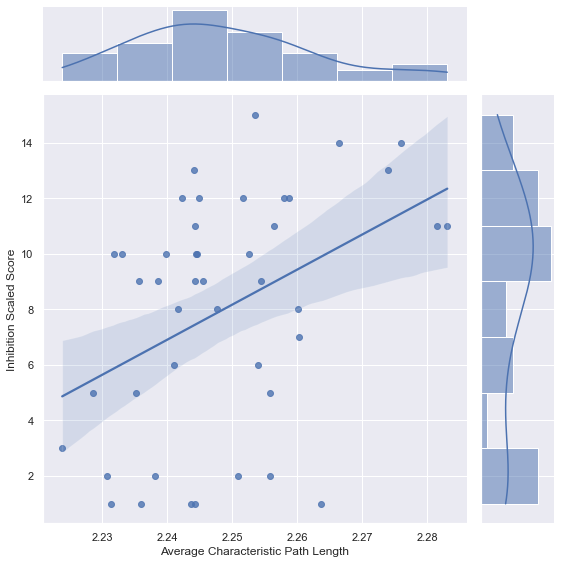

(0.4126369864606887, 0.005376740411088383)

In [59]:
#Creates a regression plot for the scaled score vs path
sns.set(style="darkgrid", color_codes=True)
n = sns.jointplot(data=average_global_noout, y='Inhibition Scaled Score', x='average_shortest_path_length', kind='reg', height=8)
n.ax_joint.set_xlabel('Average Characteristic Path Length')
plt.show()
st.pearsonr(average_global_noout['average_shortest_path_length'], average_global_noout['Inhibition Scaled Score'])

In [60]:
#Creates a regression model for scaled score vs path
import statsmodels.api as sm

#Sets variables
Y3 = average_global_noout['Inhibition Scaled Score']
X3= average_global_noout['average_shortest_path_length']

#Adds constant
X3 = sm.add_constant(X3)

#Prints out the results of the regression model
model3 = sm.OLS(Y3, X3, missing='drop')
results3= model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Inhibition Scaled Score   R-squared:                       0.170
Model:                                 OLS   Adj. R-squared:                  0.151
Method:                      Least Squares   F-statistic:                     8.619
Date:                     Mon, 06 Jun 2022   Prob (F-statistic):            0.00538
Time:                             21:33:47   Log-Likelihood:                -121.18
No. Observations:                       44   AIC:                             246.4
Df Residuals:                           42   BIC:                             249.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -275.8909     96.702     -2.853      0.007    -471.043     -80.738
average_shortest_path_length   126.2482     43.003      2.936      0.005      39.464     213.032
==============================================================================
Omnibus:                        3.512   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                2.899
Skew:                          -0.515   Prob(JB):                        0.235
Kurtosis:                       2.277   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#Calculates the standard error of the estimate for the score vs path data
np.sqrt(results3.scale)

3.8900781285211896

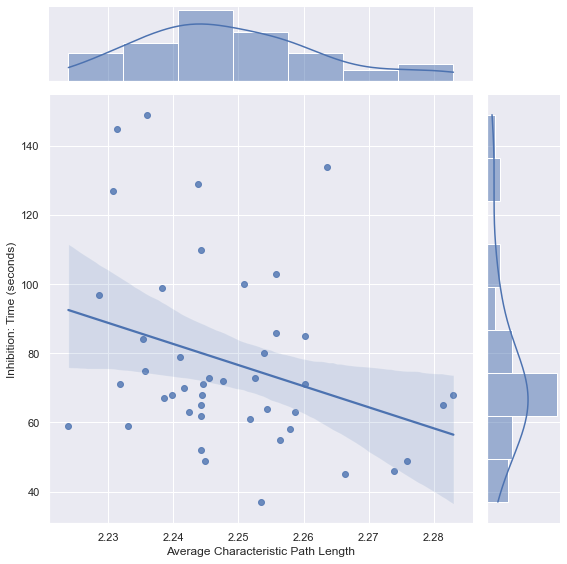

(-0.3139315382991853, 0.03796580664294525)

In [62]:
#Creates a regression plot for the time vs path
sns.set(style="darkgrid", color_codes=True)
o = sns.jointplot(data=average_global_noout, y='Inhibition: Time (seconds)', x='average_shortest_path_length', kind='reg', height=8)
o.ax_joint.set_xlabel('Average Characteristic Path Length')
plt.show()
st.pearsonr(average_global_noout['average_shortest_path_length'], average_global_noout['Inhibition: Time (seconds)'])

In [63]:
#Creates a regression model for time vs path
import statsmodels.api as sm

#Sets variables
Y4 = average_global_noout['Inhibition: Time (seconds)']
X4= average_global_noout['average_shortest_path_length']

#Adds constant
X4 = sm.add_constant(X4)

#Prints out the results of the regression model
model4 = sm.OLS(Y4, X4, missing='drop')
results4= model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Inhibition: Time (seconds)   R-squared:                       0.099
Model:                                    OLS   Adj. R-squared:                  0.077
Method:                         Least Squares   F-statistic:                     4.592
Date:                        Mon, 06 Jun 2022   Prob (F-statistic):             0.0380
Time:                                21:33:57   Log-Likelihood:                -204.27
No. Observations:                          44   AIC:                             412.5
Df Residuals:                              42   BIC:                             416.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1446.9775    639.149      2.264      0.029     157.122    2736.833
average_shortest_path_length  -609.0562    284.229     -2.143      0.038   -1182.653     -35.460
==============================================================================
Omnibus:                        9.622   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.122
Skew:                           1.082   Prob(JB):                       0.0105
Kurtosis:                       3.544   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Calculates the standard error of the estimate for the time vs path data
np.sqrt(results4.scale)

25.711374598528593